In [1]:
import projectq
from projectq.ops import All, Measure, QubitOperator, TimeEvolution, X, HGate,Rz
from scipy.optimize import minimize
import numpy as np
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
import pickle
with open("ham_HeH.txt",'rb') as fp:
    qubit_hamiltonians=pickle.load(fp)

qubit_hamiltonians=qubit_hamiltonians[:20]
n_samples=len(qubit_hamiltonians)

def ham(qubit_hamiltonians,i):
    a_ham=qubit_hamiltonians[i].terms
    ham=0*QubitOperator('Z0')
    for k,v in a_ham.items():
        o_list=[a[1]+str(a[0]) for a in k]
        ham+=v*QubitOperator(' '.join(o_list))
    return ham

In [3]:
def loss_H(theta,ham):
    eng = projectq.MainEngine()
    wavefunction = eng.allocate_qureg(4)
    # Initialize the Hartree Fock state |01>
    X | wavefunction[0]
    X | wavefunction[1]
    # build the operator for ansatz wavefunction
    ansatz_op1 = QubitOperator('Y0 Z1 X2')
    ansatz_op2 = QubitOperator('Y1 Z2 X3')
    ansatz_op3 = QubitOperator('Y0 X1 X2 X3')
    # Apply the unitary e^{-i * ansatz_op * t}
    TimeEvolution(theta[0], ansatz_op1) | wavefunction
    TimeEvolution(theta[1], ansatz_op2) | wavefunction
    TimeEvolution(theta[2], ansatz_op3) | wavefunction
    # flush all gates
    eng.flush()
    energy = eng.backend.get_expectation_value(ham, wavefunction) 
    All(Measure) | wavefunction
    return energy

# fix the Hamiltonian
def landscape_H(thetas,ham):
    es=[]
    for i in range(thetas.shape[0]):
        es.append(loss_H(thetas[i,:],ham))
    return np.array(es).tolist()

# all Hamiltonians
def landscape_Hs(thetas,hams):
    es=[]
    for i in range(len(hams)):
        es.append(landscape_H(thetas,hams[i]))
    return np.array(es)

In [4]:
ys = np.linspace(-np.pi,np.pi,20)
zs = np.linspace(-np.pi,np.pi,20)
thetas=np.array([[0,y,z] for y in ys for z in zs])

In [5]:
thetas.shape

(400, 3)

In [6]:
hams=[]
for i in range(len(qubit_hamiltonians)):
    hams.append(ham(qubit_hamiltonians,i))
landscapes=landscape_Hs(thetas,hams)

In [7]:
landscapes=landscapes.reshape(20,20,20)

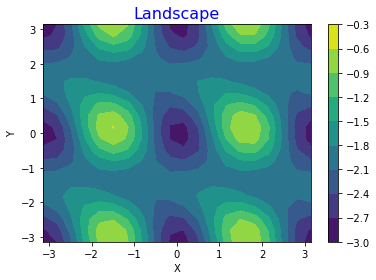

In [8]:
fig=plt.figure()
ax = fig.gca()
x = np.linspace(-np.pi,np.pi,20)
y = np.linspace(-np.pi,np.pi,20)
x, y = np.meshgrid(x, y)#生成网格点
z=landscapes[7,:,:]
# Plot the 3D surface
cset=plt.contourf(x,y,z)
plt.colorbar(cset)

#ax.plot_surface(x, y, z, rcount =100, ccount = 100, cmap ="jet", alpha = 0.8)
#rcount，ccount为绘制曲面时网格片的行数和列数
#help(ax.plot_surface)
#ax.set_xlim(-3, 3)
#ax.set_ylim(-3, 3)
#ax.set_zlim(-2, 2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
#ax.set_zlabel('Z')
ax.set_title("Landscape",fontsize =16, color ="b")
plt.show()

In [9]:
z.min(axis=1)

array([-2.84623125, -2.74978021, -2.50110012, -2.23222119, -2.08078909,
       -2.0711393 , -2.07930071, -2.36007949, -2.65175758, -2.82144618,
       -2.82144735, -2.63899608, -2.35614783, -2.13234553, -2.07207747,
       -2.04660025, -2.2056558 , -2.51435271, -2.75740414, -2.84623125])

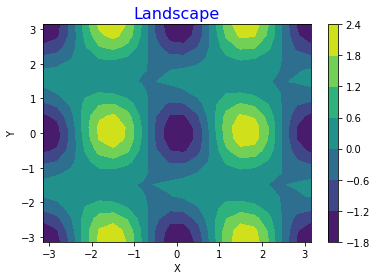

In [10]:
fig=plt.figure()
ax = fig.gca()
x = np.linspace(-np.pi,np.pi,20)
y = np.linspace(-np.pi,np.pi,20)
x, y = np.meshgrid(x, y)#生成网格点
z=landscapes[2,:,:]
# Plot the 3D surface
cset=plt.contourf(x,y,z)
plt.colorbar(cset)
#ax.plot_surface(x, y, z, rcount =100, ccount = 100, cmap ="jet", alpha = 0.8)
#rcount，ccount为绘制曲面时网格片的行数和列数
#help(ax.plot_surface)
#ax.set_xlim(-3, 3)
#ax.set_ylim(-3, 3)
#ax.set_zlim(-2, 2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
#ax.set_zlabel('Z')
ax.set_title("Landscape",fontsize =16, color ="b")
plt.show()